In [1]:
import numpy as np
import pylab
from scipy.io.wavfile import write
import os
from math import exp
from functionGenerator import functionGenerator
import matplotlib as mpl 
mpl.rcParams['agg.path.chunksize'] = 10000

samplingRate = 44100.0
samplingInterval = 1/samplingRate

class synthesizer:
    def __init__(self, lenth):
        self.lenth = lenth
        self.timeSequence = np.arange(0, lenth, samplingInterval)
        self.base = np.full(len(self.timeSequence),0)
        self.sequence = np.full(len(self.timeSequence),0)
        
    def noteGenerate(self):
        while(True):
            s = input()
            if (s == "stop"):
                break
            noteInfo = s.split()
            noteStart = float(noteInfo[0])
            noteEnd = float(noteInfo[1])
            noteScale = noteInfo[2]
            noteWave = noteInfo[3]
            
            startN = len(np.arange(0, noteStart, samplingInterval))
            lenN = len(np.arange(0, noteEnd, samplingInterval))
            
            noteGenerate = functionGenerator(noteEnd - noteStart, noteScale, noteWave)
            noteSignal = noteGenerate.signal
            note = np.concatenate((self.base[0:startN], noteSignal ,self.base[lenN:]), axis = 0)[:len(self.timeSequence)]
            self.sequence = self.sequence + note
            noteInfo = []
            pylab.plot(self.timeSequence,self.sequence)


In [2]:
s = synthesizer(30)
print(len(s.sequence))
print(len(s.base))

1323000
1323000


0 10 A sin
0 10 A noise
stop


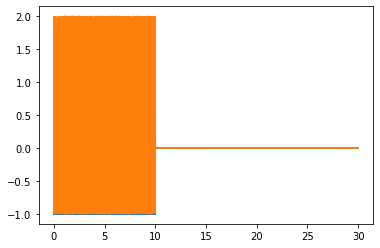

In [3]:
s.noteGenerate()

0

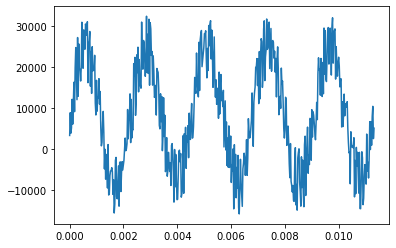

In [6]:
# save as wav file
scaled = np.int16(s.sequence/np.max(np.abs(s.sequence)) * 32767)
pylab.plot(s.timeSequence[:500], scaled[:500])

write('har1.wav', 44100, scaled)
# play wav file
os.system("har1.wav")

# Low Pass Filter

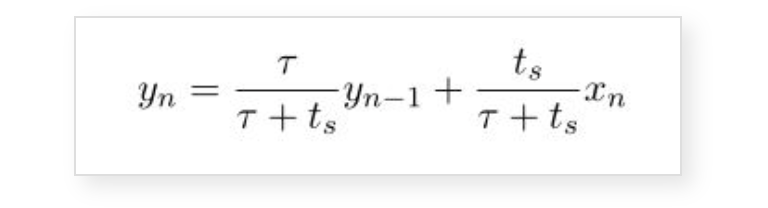

https://pinkwink.kr/1345

In [7]:
class LowPassFilter:
    def __init__(self, cutoff_freq, ts):
        self.ts = ts
        self.cutoff_freq = cutoff_freq
        self.pre_out = 0.
        self.tau = self.calc_filter_coef() 
        
    def calc_filter_coef(self):
        w_cut = 2*np.pi*self.cutoff_freq
        return 1/w_cut
        
    def filter(self, data):
        out = (self.tau * self.pre_out + self.ts * data) / (self.tau + self.ts)
        self.pre_out = out
        return out

In [8]:
lpf = LowPassFilter(cutoff_freq = 0.5, ts = 0.01)
filtered_data = [lpf.filter(data) for data in s.sequence]

0

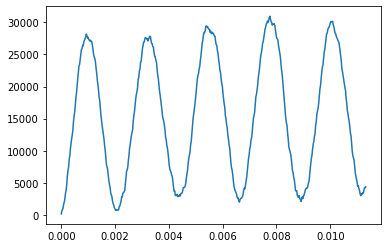

In [9]:
# save as wav file
scaled = np.int16(filtered_data/np.max(np.abs(filtered_data)) * 32767)
pylab.plot(s.timeSequence[:500], scaled[:500])

write('har2.wav', 44100, scaled)
# play wav file
os.system("har2.wav")